In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
Z=18
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.4
# from svg2emf import svg2emf

In [3]:
def read_file(fname):
    f = open(fname, 'r')
    fl = f.readlines()
    f.close()
    clean = np.array([line.split() for line in fl if "@" not in line and "#" not in line]).astype('float')
    return clean

def cum_rdf(rdf, ndx):
    R = rdf[:,0]
    dr = R[1] - R[0]
    ff = np.multiply(np.power(R,2), rdf[:,ndx])*dr
    ff = np.cumsum(ff)
    ff /= ff[-1]
    return ff

In [4]:
titles = ['PEG', "Terminal Bead"]
NP = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fracs = np.round(1-np.array(NP, dtype='float')/10, 1)
labels = ["f={}".format(ff) for ff in fracs]
colors = cm.RdYlGn(np.linspace(0,1,len(NP)))

RDFs = np.array([read_file("Comenge2015/RDF/NP{}_PRO1_rdf_cum_boot.sfu".format(nn, nn)) for nn in NP])

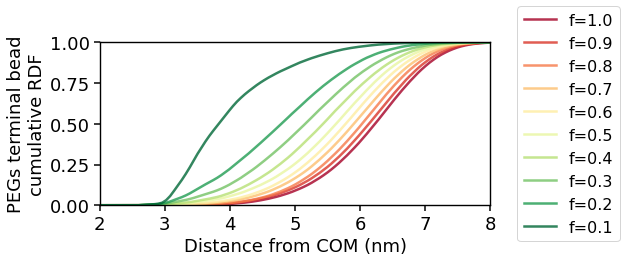

In [5]:
fig, ax = plt.subplots(figsize=(7,3.))
for rdfs, nn, lab, c in zip(RDFs, NP, labels, colors):
    rdfs[:,1] = rdfs[:,1]/rdfs[-1,1]
    ax.errorbar(rdfs[:,0], rdfs[:,1], fmt='-', color=c, mec='k', mew=1.5, ms=10, lw=2.5, label=lab, alpha=0.8)
ax.tick_params(labelsize=Z, size=6, width=1.5)
ax.set_ylim(0,1)
ax.set_xlim(2,8)
#ax.grid()
ax.set_xlabel("Distance from COM (nm)", fontsize=Z)
ax.legend(fontsize=Z-2, bbox_to_anchor=(1.2,0.5), loc='center')
ax.set_ylabel("PEGs terminal bead\ncumulative RDF", fontsize=Z)
plt.savefig("cumrdf.svg", format='svg', bbox_inches='tight')
# svg2emf("cumrdf.svg")
plt.show()
plt.close()

In [6]:
GYRs = {nn : read_file("Comenge2015/GYR/NP{}_PRO1_gyr.xvg".format(nn, nn)) for nn in NP}

In [7]:
def gyr2hyd(gyr, equil_ps=25000):
    mask = gyr[:,0]>=equil_ps
    rg = gyr[mask,-1]
    rg_mean, rg_std = np.mean(rg), np.std(rg)
    rh_mean, rh_std = (5/3.)**0.5*rg_mean, (5/3.)**0.5*rg_std 
    return rg_mean, rg_std

In [8]:
HYDs = {key: gyr2hyd(val) for key, val in GYRs.items()}

In [9]:
HYDs.values()

dict_values([(2.417087132196162, 0.04573779722360256), (2.3402321321961623, 0.013157124329185855), (2.2601368763326226, 0.012249549373707862), (2.184063933901919, 0.011921332851452443), (2.0906973773987207, 0.01175805848729369), (2.0099216098081025, 0.012150060985447594), (1.8974094989339019, 0.010701948792527836), (1.7986230916844352, 0.010556403054646423), (1.7060828358208957, 0.007804236224355327), (1.606835234541578, 0.004207495215655794)])

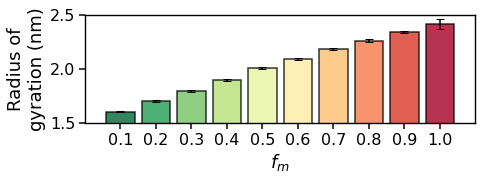

In [11]:
RH_means = [v[0] for v in HYDs.values()]
RH_std = [v[1] for v in HYDs.values()]
fig, ax = plt.subplots(figsize=(7,2.))
ax.tick_params(labelsize=Z-2, size=6, width=1.5)
ax.bar(NP, RH_means, yerr=RH_std, color=colors, lw=1.5, edgecolor='k', alpha=0.8, capsize=4)
ax.set_xticks(NP)
ax.set_xticklabels(fracs)
ax.set_yticks([1.5,2.,2.5,3])
ax.set_ylim(1.5,2.5)
ax.set_xlim(10,-1)
ax.set_xlabel("$f_m$", fontsize=Z)
ax.set_ylabel("Radius of\ngyration (nm)", fontsize=Z)
plt.savefig("hydrad.svg", format='svg', bbox_inches='tight')
# svg2emf("hydrad.svg")
plt.show()
plt.close()

[[46.77  40.2   36.555]
 [43.785 38.126 34.533]
 [39.553 34.201 31.008]]
[[46.77  43.785 39.553]
 [40.2   38.126 34.201]
 [36.555 34.533 31.008]]


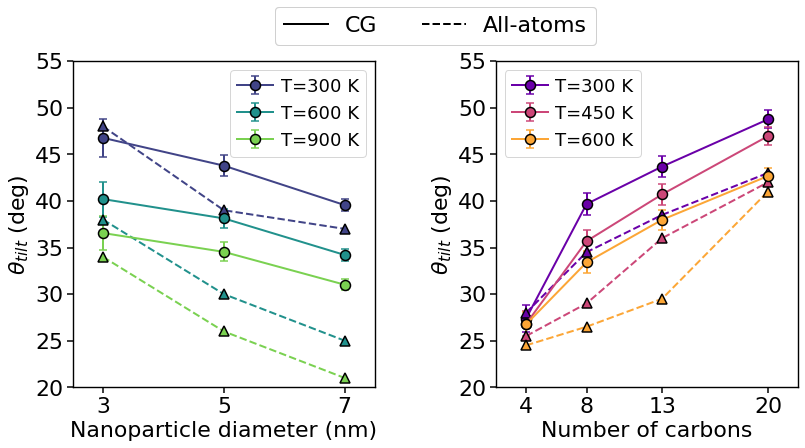

In [29]:
Z=22
STD=True
cm1 = cm.viridis(np.linspace(0.2,0.8,3))
cm2 = cm.plasma(np.linspace(0.2,0.8,3))

data = np.genfromtxt("Ghorai2007/angles.sfu")
block1 = data[:9,1]
block1_std = data[:9,2]
block1 = np.reshape(block1, (3,3))
print(block1)
block1 = block1.T  # invert temperature for NP size
print(block1)
block1_std = np.reshape(block1_std, (3,3))
block1_std = block1_std.T  # invert temperature for NP size
block2 = data[9:,1]
block2_std = data[9:,2]
block2 = np.reshape(block2, (4,3)).T
block2_std = np.reshape(block2_std, (4,3)).T

if not STD:
    block1_std = np.zeros_like(block1_std)
    block2_std = np.zeros_like(block2_std)

sizes1 = [3, 5, 7]
carbons2 = [4, 8, 13, 20]
exp1 = np.array([[48,38,34], [39,30,26], [37,25,21]]).T   # invert temperature for NP size
exp2 = [[28,34.5,38.5,43], [25.5,29,36,42], [24.5,26.5,29.5,41]]

labels1 = ["T=300 K", "T=600 K", "T=900 K"]
labels2 = ["T=300 K", "T=450 K", "T=600 K"]
labels = [labels1, labels2]

cms = [cm1, cm2]
blocks = [block1, block2]
blocks_stds = [block1_std, block2_std]
XX = [sizes1, carbons2]
experimental = [exp1, exp2]
fig, axs = plt.subplots(figsize=(13,6.), ncols=2, gridspec_kw={'wspace':0.4})
for ax, xx, exps, block, block_std, color, label in zip(axs, XX, experimental, blocks, blocks_stds, cms, labels):
    ax.set_ylim(20,55)
    ax.tick_params(labelsize=Z, size=6, width=1.5)
    ax.set_ylabel(r"$\theta_{tilt}$ (deg)", fontsize=Z)
    for b, std, c, exp, lab in zip(block, block_std, color, exps, label):
        ax.errorbar(xx, b, yerr=std, fmt='o-', color=c, mec='k', mew=1.5, ms=10, lw=2, label=lab, capsize=4, capthick=2)
        ax.errorbar(xx, exp, fmt='^--', color=c, mec='k', mew=1.5, ms=10, lw=2)
    tmp1 = ax.errorbar([],[], fmt='-', color='k', mec='k', mew=1.5, ms=10, lw=2, capsize=4, capthick=2)
    tmp2 = ax.errorbar([],[], fmt='--', color='k', mec='k', mew=1.5, ms=10, lw=2)
    leg = plt.legend([tmp1, tmp2], ['CG', 'All-atoms'], fontsize=Z, loc='upper center', bbox_to_anchor=(-0.2,1.2), ncol=2)
    plt.gca().add_artist(leg)

axs[0].legend(fontsize=Z-4, handletextpad=0.4, loc='upper right')
#axs[0].set_ylim(15,50)
axs[0].set_xlim(2.5, 7.5,1000)
axs[0].set_xticks(sizes1)
axs[0].set_xlabel("Nanoparticle diameter (nm)", fontsize=Z)

axs[1].legend(fontsize=Z-4, handletextpad=0.4, loc='upper left')
#axs[1].set_ylim(20,45)
axs[1].set_xlim(2,22)
axs[1].set_xticks([4,8,13,20])
axs[1].set_xlabel("Number of carbons", fontsize=Z)

plt.savefig("angles.svg", format='svg', bbox_inches="tight")
# svg2emf("angles.svg")
plt.show()
plt.close()

In [30]:
experimental = [1.15, 1.30, 1.45, 2.00, 2.15]
widths = [1.10, 1.35, 1.65, 1.90, 2.3]
err = [0.05, 0.08, 0.08, 0.08, 0.09]

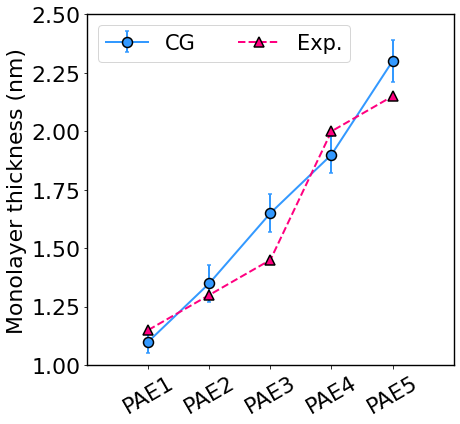

In [41]:
XX = np.linspace(1, 5, 5)
NP = [1, 2, 3, 4, 5]
fig, ax = plt.subplots(figsize=(6.5, 6))
ax.errorbar(XX, widths, yerr=err, fmt='o-', color=(0.2, 0.6, 1.0),
            mec='k', mew=1.5, ms=10, lw=2, label="CG", capsize=2)
ax.errorbar(XX, experimental, fmt='^--', color=(1.0, 0.0, 0.5),
            mec='k', mew=1.5, ms=10, lw=2, label="Exp.")
ax.legend(ncol=2, fontsize=Z - 1, loc='upper left')
ax.set_ylim(1, 2.75)
ax.set_xlim(0, 6)
# ax.set_xlabel("Ligand", fontsize=Z)
ax.set_xticks(XX)
ax.set_xticklabels(["PAE{}".format(nn) for nn in NP], rotation=30)
ax.set_yticks(np.linspace(1, 2.5, 7))
ax.set_ylim(1, 2.5)
ax.set_ylabel("Monolayer thickness (nm)", fontsize=Z)
ax.tick_params(labelsize=Z)
plt.tight_layout()
plt.savefig("compare.svg", format='svg', bbox_inches="tight")
plt.show()
plt.close()
